In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 256                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 1


args.data_name                        =  "hapt"

args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.wavelet_filtering_finetuning     = True
args.wavelet_filtering_finetuning_percent = 0.5
args.wavelet_filtering_learnable      = False
args.wavelet_filtering_layernorm      = True

args.regulatization_tradeoff          = 0.0001
args.number_wavelet_filtering         = 6


args.difference       = False 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"
if args.data_name      ==  "skodar":
    args.exp_mode            = "SOCV"
config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.5
args.model_type              = None#"deepconvlstm"#"sahar" #"deepconvlstm"

# 实验

In [5]:
# 如果我们设置为 
args.wavelet_filtering_learnable      = False
exp = Exp(args)

Use GPU: cuda:0
clone the  wavefiler weight
wavelet layernorm
Wavelet Filtering Regularization
Build the None model!
Done!
Parameter : 31
Set the seed as :  1


In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)

In [7]:
exp.train()

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 30 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.0006689  0.00068213 0.00073746 0.00061275 0.00056243 0.00056754
 0.00746269 0.01041667 0.00641026 0.00719424 0.00534759 0.00724638]
Train data number :  10339
The number of classes is :  12
The input_length  is :  128
The channel_in is :  6
Validation data number :  1149
Test data number :  6632
================ Build the model ================ 
clone the  wavefiler weight
wavelet layernorm
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 6.4721362590789795
VALI: Epoch: 1, Steps: 41 | Train Loss: 2.1634821  Vali Lo

Epoch: 27 cost time: 5.2410383224487305
VALI: Epoch: 27, Steps: 41 | Train Loss: 0.2296356  Vali Loss: 0.3160310 Vali Accuracy: 0.8894691  Vali weighted F1: 0.8887231  Vali macro F1 0.7416491 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 28 cost time: 5.235428094863892
VALI: Epoch: 28, Steps: 41 | Train Loss: 0.2217693  Vali Loss: 0.2990271 Vali Accuracy: 0.8903394  Vali weighted F1: 0.8902923  Vali macro F1 0.7718385 
new best score!!!!
Validation loss decreased (0.305636 --> 0.299027).  Saving model ...
new best score!!!!
Epoch: 29 cost time: 5.266258955001831
VALI: Epoch: 29, Steps: 41 | Train Loss: 0.2149159  Vali Loss: 0.2876340 Vali Accuracy: 0.8955614  Vali weighted F1: 0.8955130  Vali macro F1 0.7759248 
new best score!!!!
Validation loss decreased (0.299027 --> 0.287634).  Saving model ...
new best score!!!!
Epoch: 30 cost time: 5.277202606201172
VALI: Epoch: 30, Steps: 41 | Train Loss: 0.2061849  Vali Loss: 0.2704735 Vali Accuracy: 0.9

KeyboardInterrupt: 

In [6]:
dataset = data_dict[args.data_name](args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------


In [7]:
import numpy as np

In [8]:
start_index = dataset.train_slidingwindows[0][1]
end_index   = dataset.train_slidingwindows[0][2]
sample_x_1    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

start_index = dataset.train_slidingwindows[100][1]
end_index   = dataset.train_slidingwindows[100][2]
sample_x_2    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

temp_1 = np.expand_dims(sample_x_1,0)
temp_2 = np.expand_dims(sample_x_2,0)
combined_x = np.concatenate([temp_1,temp_2],axis=0)
combined_x = np.expand_dims(combined_x,1)
combined_x = torch.tensor(combined_x).double().to(exp.device)
print(combined_x.shape)

torch.Size([2, 1, 128, 6])


In [9]:
out = exp.model(combined_x)
out = out.cpu().detach().numpy()

In [10]:
out.shape

(2, 31, 128, 6)

In [20]:
weight = exp.model.wave_conv.wavelet_conv.weight.cpu().detach().numpy()

In [18]:
for n,p in exp.model.named_parameters():
    print(n)

gamma
wave_conv.wavelet_conv.weight


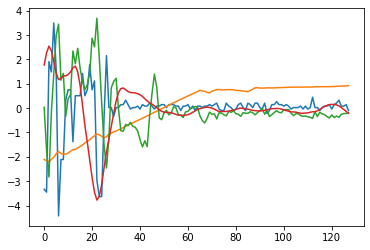

In [23]:
import matplotlib.pyplot as plt
index1 = 0
index2 = 0

plt.figure()
plt.plot(out[0,0,:,index2])
plt.plot(out[0,1,:,index2])
plt.plot(out[0,2,:,index2])
plt.plot(out[0,3,:,index2])

In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)